In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the datasets

socioeconomic_df = pd.read_csv("socioeconomic_dataset.csv")
health_burden_df = pd.read_csv("health_burden_dataset.csv")
risk_factors_df = pd.read_csv("risk_factor_dataset.csv")

In [4]:
risk_factors_df.head()

,measure,location,cause,risk_factor,metric,year,val
0,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2000,257.840865
1,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2001,249.595886
2,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2002,245.426604
3,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2003,268.556783
4,Deaths,Morocco,Chronic obstructive pulmonary disease,Ambient ozone pollution,Number,2004,298.192621


In [5]:
# Standardize column names for consistency
socioeconomic_df.rename(columns={'Country': 'country', 'Year': 'year'}, inplace=True)
health_burden_df.rename(columns={'location': 'country'}, inplace=True)
risk_factors_df.rename(columns={'location': 'country'}, inplace=True)

In [6]:
# Step 2: Normalize text values for merging
socioeconomic_df['country'] = socioeconomic_df['country'].str.strip().str.lower()
health_burden_df['country'] = health_burden_df['country'].str.strip().str.lower()
risk_factors_df['country'] = risk_factors_df['country'].str.strip().str.lower()

In [7]:
# Step 3: Subset COPD-specific rows from burden and risk datasets
copd_burden_df = health_burden_df[
    health_burden_df['cause'].str.contains("chronic obstructive pulmonary disease", case=False)
].copy()

copd_risk_df = risk_factors_df[
    risk_factors_df['cause'].str.contains("chronic obstructive pulmonary disease", case=False)
].copy()

In [8]:
# Step 4: Pivot health burden data to wide format ---
burden_pivot = copd_burden_df.pivot_table(
    index=['country', 'year'],
    columns='measure',
    values='val',
    aggfunc='mean'
).reset_index()

In [9]:
# Step 5: Pivot risk factor data to wide format ---
risk_pivot = copd_risk_df.pivot_table(
    index=['country', 'year'],
    columns='risk_factor',
    values='val',
    aggfunc='mean'
).reset_index() 

In [10]:
# Step 6: Merge all datasets on 'country' and 'year' 
merged_df = socioeconomic_df.merge(burden_pivot, on=['country', 'year'], how='left')
merged_df = merged_df.merge(risk_pivot, on=['country', 'year'], how='left')

# Preview the final merged dataset
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.head())


Merged DataFrame shape: (1040, 28)
   country       Sub-Region  year  Population  GDP PER CAPITA (USD)  \
0  algeria  Northern Africa  2000    30774621               1780.38   
1  algeria  Northern Africa  2001    31200985               1754.58   
2  algeria  Northern Africa  2002    31624696               1794.81   
3  algeria  Northern Africa  2003    32055883               2117.05   
4  algeria  Northern Africa  2004    32510186               2624.80   

   Area (Km2)  Population Density  Total CO2 Emission excluding LUCF (Mt)  \
0     2381741           12.921061                                   80.05   
1     2381741           13.100075                                   78.65   
2     2381741           13.277974                                   82.40   
3     2381741           13.459013                                   88.19   
4     2381741           13.649757                                   89.49   

   Nitrogen Oxide  Sulphur Dioxide  ...       Deaths     Incidence  \
0    

In [13]:
# Ensure proper year formatting
merged_df['year'] = merged_df['year'].astype(int)

# Create DALYs Metric
merged_df['DALYs'] = merged_df[['Deaths', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']].sum(axis=1)

merged_df.head()

,country,Sub-Region,year,Population,GDP PER CAPITA (USD),Area (Km2),Population Density,Total CO2 Emission excluding LUCF (Mt),Nitrogen Oxide,Sulphur Dioxide,...,Incidence,Prevalence,YLDs (Years Lived with Disability),YLLs (Years of Life Lost),Ambient ozone pollution,Ambient particulate matter pollution,Household air pollution from solid fuels,Secondhand smoke,Smoking,DALYs
0,algeria,Northern Africa,2000,30774621,1780.38,2381741,12.921061,80.05,242832.24,89269.27,...,28242.647531,408840.830313,25101.743830,51360.935434,5054.980944,9375.097693,354.386610,3437.971977,13305.271759,78956.308305
1,algeria,Northern Africa,2001,31200985,1754.58,2381741,13.100075,78.65,246238.80,83231.85,...,29540.993463,426458.817482,26172.587156,52695.269981,5081.895308,9638.739979,325.150285,3547.952804,13640.704588,81426.606993
2,algeria,Northern Africa,2002,31624696,1794.81,2381741,13.277974,82.40,271977.39,108062.85,...,31153.212398,447935.566209,27464.657091,54682.299394,4844.384940,9959.869207,293.801265,3701.332607,14130.376786,84803.350599
3,algeria,Northern Africa,2003,32055883,2117.05,2381741,13.459013,88.19,276968.15,99115.59,...,32909.566644,471288.546293,28878.681108,56740.531108,4919.215499,10280.677842,259.948892,3866.094336,14689.413591,88395.030373
4,algeria,Northern Africa,2004,32510186,2624.80,2381741,13.649757,89.49,290319.45,105658.06,...,34679.926076,494937.364024,30304.611356,58715.119957,5145.654330,10556.059161,225.717856,4029.419293,15191.876843,91903.762506


In [16]:

#Missing Data Summary
# ----------------------------
missing_data_pct = (merged_df.isna().mean() * 100).sort_values(ascending=False)

print(missing_data_pct)

HAQ_Index                                   95.288462
Chronic_Respiratory(RSD)                    95.288462
Ambient ozone pollution                      5.769231
Ambient particulate matter pollution         5.769231
Smoking                                      5.769231
YLDs (Years Lived with Disability)           5.769231
YLLs (Years of Life Lost)                    5.769231
Prevalence                                   5.769231
Incidence                                    5.769231
DALYs (Disability-Adjusted Life Years)       5.769231
Deaths                                       5.769231
Secondhand smoke                             5.769231
Household air pollution from solid fuels     5.769231
GDP PER CAPITA (USD)                         2.500000
Organic Carbon                               0.000000
Carbon Monoxide                              0.000000
Sulphur Dioxide                              0.000000
NMVOCs                                       0.000000
Total CO2 Emission excluding

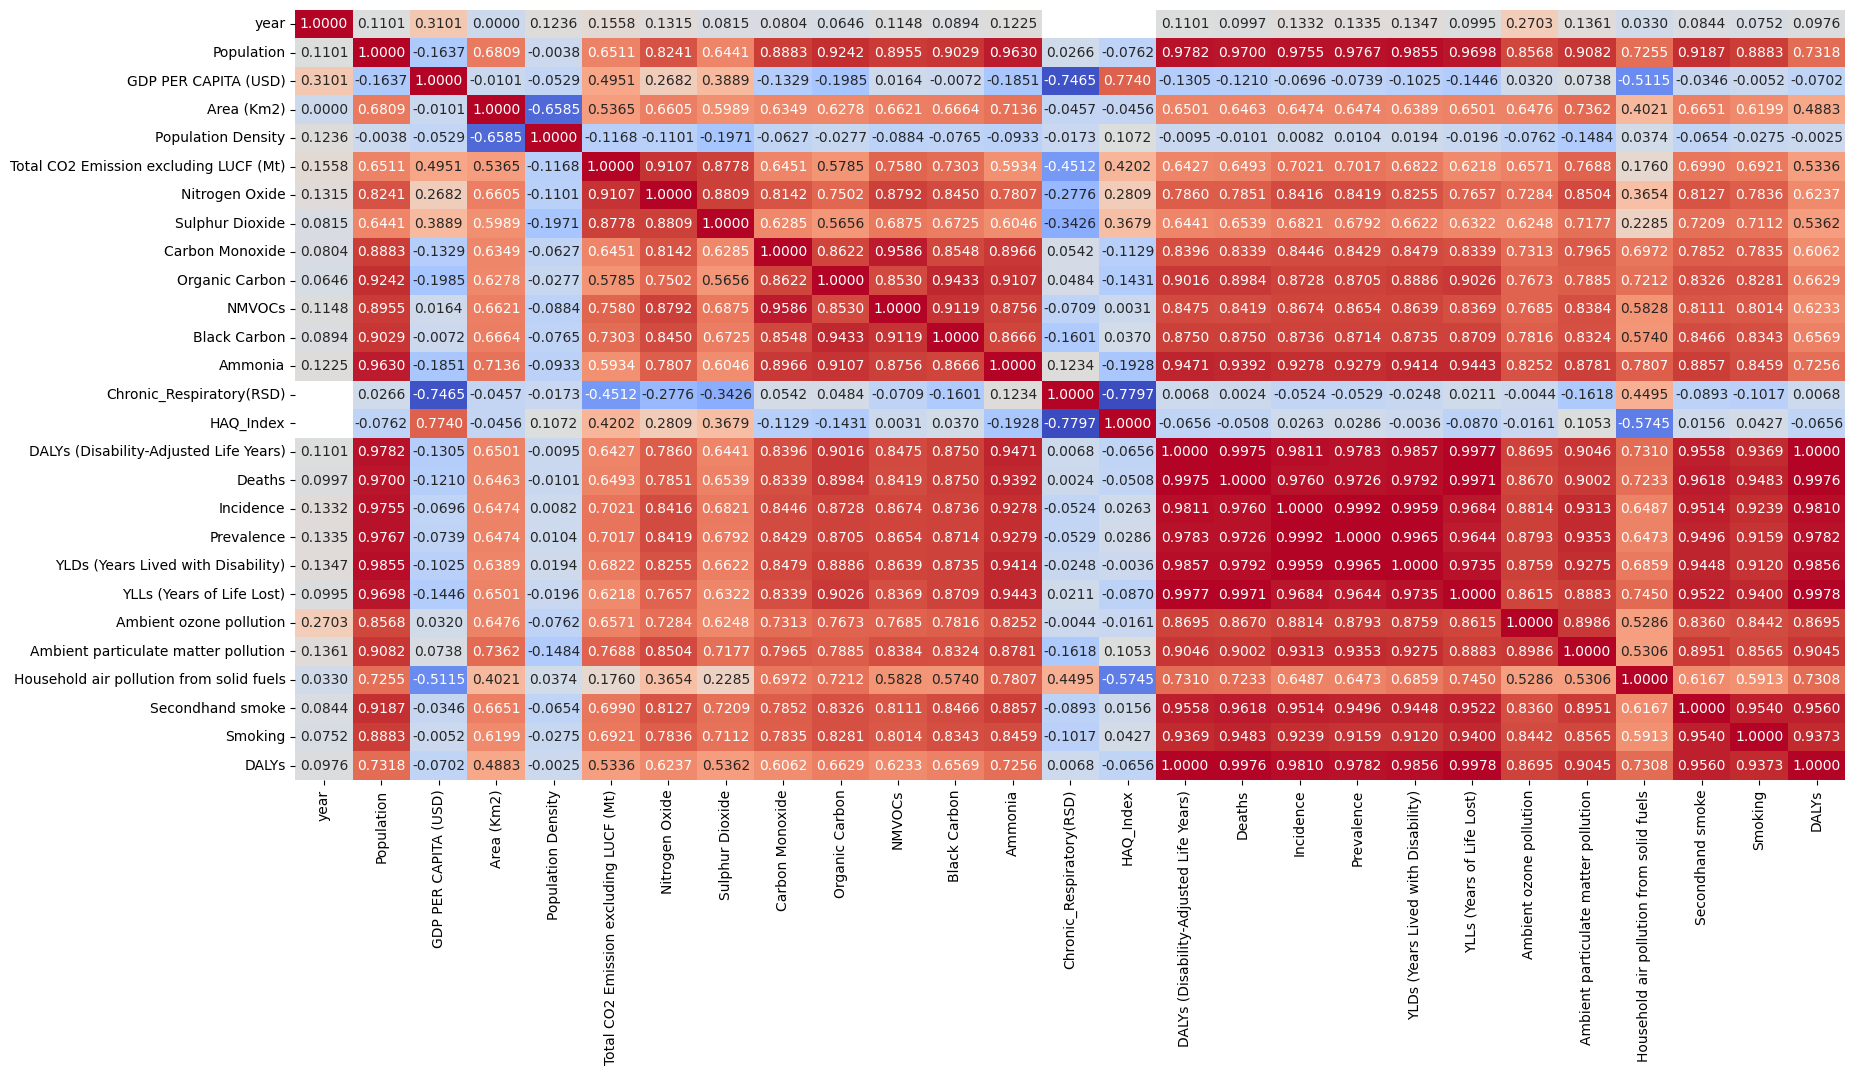

In [23]:
# Correlation Matrix
eda_numeric = merged_df.select_dtypes(include=['float64', 'int64'])
eda_corr = eda_numeric.corr(method='spearman')

# Plot heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(eda_corr, annot=True, fmt='.4f', 
            cmap='coolwarm', cbar=False, ax=ax)

# Adjust y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Save figure
#plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

## **Analysis of the Correlation Heatmap**

### **1. Strong Positive Correlations**
- **Health Impact Metrics:**  
  Variables like **DALYs (Disability-Adjusted Life Years), YLLs (Years of Life Lost), YLDs (Years Lived with Disability), Incidence, Prevalence, and Deaths** are highly correlated (values close to 1). This suggests that these health burden metrics tend to increase together.
- **Air Pollutants:**  
  Strong correlations exist between pollutants like **Carbon Monoxide, Black Carbon, Ammonia, Organic Carbon, and Sulphur Dioxide**, indicating they often coexist in similar environmental conditions.

### **2. Strong Negative Correlations**
- **GDP Per Capita vs. Health Burden:**  
  **GDP per capita** shows a negative correlation with health burden indicators (**DALYs, Deaths, Incidence, and YLLs**). This suggests that wealthier regions tend to experience lower disease burden.
- **GDP Per Capita vs. Pollution:**  
  There are weak to moderate negative correlations between **GDP per capita and various air pollutants**, indicating that economically developed areas may have better environmental controls.

### **3. Population Density and Pollution**
- Population density appears to be **moderately correlated** with pollutants like **Nitrogen Oxide, Carbon Monoxide, and Black Carbon**, suggesting that urban areas with higher populations may have higher pollution levels.

### **4. Respiratory Disease and Air Pollution**
- **Chronic Respiratory Diseases (RSD) have moderate to strong correlations with pollutants** like **Sulphur Dioxide, Nitrogen Oxide, and Black Carbon**, suggesting that exposure to these pollutants may be linked to respiratory illnesses.

### **5. Outliers and Unexpected Correlations**
- **Household air pollution from solid fuels has a weaker correlation with outdoor air pollutants** than expected, which might indicate differences in sources of pollution (indoor vs. outdoor).
- **Smoking and secondhand smoke do not exhibit the strongest correlations with respiratory diseases, which could be due to other confounding factors.**

### **Conclusion**
The heatmap suggests significant relationships between air pollution and health outcomes, highlighting the potential impact of environmental factors on public health. It also indicates economic disparities in health outcomes, as seen in the negative correlation between GDP per capita and disease burden.

In [25]:
#COPD Burden by Sub-Region
regional_burden = merged_df.groupby('Sub-Region')[
    ['Deaths', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']
].mean().sort_values(by='Deaths', ascending=False)

regional_burden

,Deaths,YLLs (Years of Life Lost),YLDs (Years Lived with Disability)
Sub-Region,,,
Northern Africa,3854.930292,83402.288800,29878.212504
Southern Africa,2816.480236,59565.218855,17967.243400
Eastern Africa,1688.341717,38645.773570,11643.659742
Western Africa,1592.114084,34926.257194,15870.254598
Middle Africa,829.249507,19869.948638,5990.928695


In [26]:
# Top Countries by COPD Burden
top_countries_copd = merged_df.groupby('country')[
    ['Deaths', 'YLLs (Years of Life Lost)', 'Smoking', 'Ambient particulate matter pollution']
].mean().sort_values(by='Deaths', ascending=False).head(10)

top_countries_copd

,Deaths,YLLs (Years of Life Lost),Smoking,Ambient particulate matter pollution
country,,,,
south africa,12278.506360,256776.501823,51874.195684,33241.802138
nigeria,11031.339674,231243.227133,13088.903210,38452.224498
egypt,9127.895670,213128.791406,52850.785411,67586.051818
ethiopia,7295.761152,162517.577787,9379.133118,6878.469517
morocco,4668.978608,95103.757284,14867.924892,14335.454144
kenya,4325.675454,95864.485283,11210.516846,4778.786523
algeria,3607.104373,69847.128432,17924.407552,12240.516191
sudan,3591.613384,81099.614955,14645.169880,12157.543378
madagascar,2995.295955,71261.539183,5187.886958,1448.448331
